<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/3model_Epoch100_BS32_DENSE392.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
#from tensorflow.keras.utils import to_categorical

In [9]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
trainY = trainX.reshape(60000,784)
testY = testX.reshape(10000,784)
input_1 = (trainX[:,:14,:])
input_2 = (trainX[:,14:28,:])

In [10]:
def build_model_1(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(392,activation = 'relu')
	])
	return model

In [11]:
def build_model_2(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(784,activation = 'relu'),
		Dense(classes, activation= "softmax")
	])
	return model

In [12]:
EPOCHS = 100
BS = 32
INIT_LR = 1e-3
print("[INFO] creating model...")
model1= build_model_1(14,28,1)
model2= build_model_1(14,28,1)
model3= build_model_2(784,1,784)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

[INFO] creating model...


In [13]:
def step(X1,X2,y):
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)
      
      X3 = tf.keras.layers.concatenate([pred1,pred2])
      
      pred3 = model3(X3)
      #print(len(pred3))
      loss = binary_crossentropy(y, pred3)
    
    grads3 = tape.gradient(loss, model3.trainable_variables)
    #print(len(grads3))
    grads1 = tape.gradient(loss, model1.trainable_variables)
    grads2 = tape.gradient(loss, model2.trainable_variables)
    #grads1 = tape.gradient(grads3[:int(len(grads3)/2)], model1.trainable_variables)
    #grads2 = tape.gradient(grads3[int(len(grads3)/2):], model2.trainable_variables)
    
    #print("loss is = ",grads1)
    
    #grads2 = tape.gradient(grads3, model2.trainable_variables)
    opt.apply_gradients(zip(grads3, model3.trainable_variables))
    #
    
    
    opt.apply_gradients(zip(grads1, model1.trainable_variables))
    opt.apply_gradients(zip(grads2, model2.trainable_variables)) 

In [14]:
#numUpdates = int(trainX.shape[0] / BS)
numUpdates = int(trainX.shape[0] / BS)
for epoch in range(0, EPOCHS):
	print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="")
	sys.stdout.flush()
	epochStart = time.time()
	for i in range(0, numUpdates):
		#print()
		
		start = i * BS
		end = start + BS
		#print("inp_1 = ",input_1[start:end])
		#print("inp_2 = ",input_2[start:end])
		step(input_1[start:end],input_2[start:end], trainY[start:end])
	epochEnd = time.time()
	elapsed = (epochEnd - epochStart) / 60.0
	print("took {:.4} minutes".format(elapsed))

[INFO] starting epoch 1/100...took 0.6214 minutes
[INFO] starting epoch 2/100...took 0.6067 minutes
[INFO] starting epoch 3/100...took 0.61 minutes
[INFO] starting epoch 4/100...took 0.6129 minutes
[INFO] starting epoch 5/100...took 0.6343 minutes
[INFO] starting epoch 6/100...took 0.5898 minutes
[INFO] starting epoch 7/100...took 0.5941 minutes
[INFO] starting epoch 8/100...took 0.5922 minutes
[INFO] starting epoch 9/100...took 0.603 minutes
[INFO] starting epoch 10/100...took 0.5877 minutes
[INFO] starting epoch 11/100...took 0.59 minutes
[INFO] starting epoch 12/100...took 0.59 minutes
[INFO] starting epoch 13/100...took 0.5967 minutes
[INFO] starting epoch 14/100...took 0.5877 minutes
[INFO] starting epoch 15/100...took 0.5858 minutes
[INFO] starting epoch 16/100...took 0.5928 minutes
[INFO] starting epoch 17/100...took 0.595 minutes
[INFO] starting epoch 18/100...took 0.5865 minutes
[INFO] starting epoch 19/100...took 0.5863 minutes
[INFO] starting epoch 20/100...took 0.5916 minut

In [15]:
# in order to calculate accuracy using Keras' functions we first need
# to compile the model
#model.compile(optimizer=opt, loss=categorical_crossentropy,
	#metrics=["acc"])
# now that the model is compiled we can compute the accuracy
#(loss, acc) = model.evaluate(testX, testY)
#print("[INFO] test accuracy: {:.4f}".format(acc))

In [22]:
input_test_1 = (testX[:,:14,:])
input_test_2 = (testX[:,14:28,:])

In [23]:
def step1(X1,X2,y):
    with tf.GradientTape(persistent=True) as tape:
      pred11 = model1(X1)
      pred22 = model2(X2)
      
      X3 = tf.keras.layers.concatenate([pred11,pred22])
      
      pred33 = model3(X3)
      #print(len(pred3))
      loss = binary_crossentropy(y, pred33)
      return pred33

In [24]:
out = step1(input_test_1[0:31],input_test_2[0:31], testY[0:31])

In [25]:
predictd_output = tf.reshape(out[4],[28,28])
input_given = tf.reshape(testY[4],[28,28])

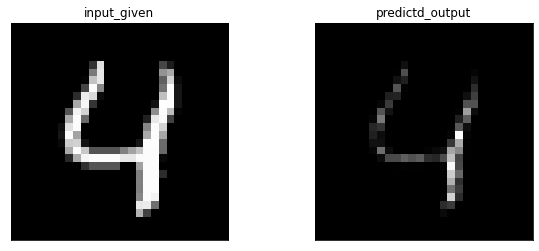

In [20]:
plt.figure(figsize=(10, 4))
# display original
ax = plt.subplot(1, 2, 1)
plt.imshow(input_given)
plt.title("input_given")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 2, 2)
plt.imshow(predictd_output)
plt.title("predictd_output")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

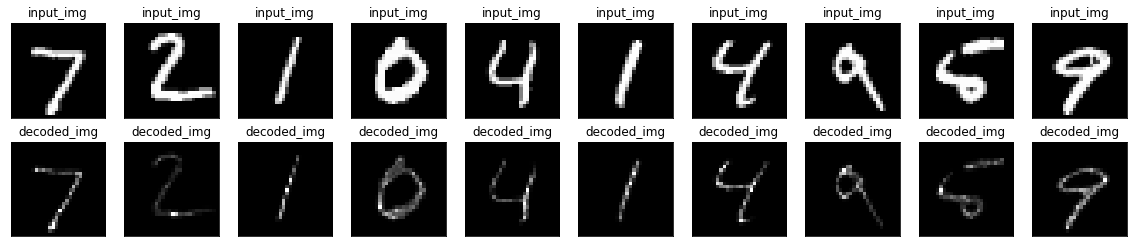

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  predictd_output = tf.reshape(out[i],[28,28])
  input_given = tf.reshape(testY[i],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("decoded_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("decoded_396_192_2_epoch")
plt.show()